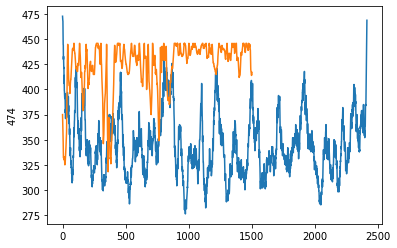

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ex_interval = pd.read_csv("data/interval/8156319964.csv")
ex_recovery = pd.read_csv("data/recovery/8882490327.csv")
sns.lineplot(ex_interval.iloc[:, 1])
sns.lineplot(ex_recovery.iloc[:, 1])
plt.show()

In [57]:
train_df = pd.DataFrame([], columns=["Name", "Label"])
test_df = pd.DataFrame([], columns=["Name", "Label"]) 
#Откинуть данные, у которых меньше 3000 стампов(неполная тренировка)
#Берем длину 0.9*3000 
#Берем 10 подпоследовательностей
#Режем train, оставляем test

In [66]:
import os 
from tqdm.notebook import tqdm
recovery_names = os.listdir("data/recovery")
interval_names = os.listdir("data/interval")
print(f"Recovery size: {len(recovery_names)}, interval size: {len(interval_names)}")
int_to_name = {
    0: "recovery", 
    1: "interval"
}

train_names, train_labels = [], []
test_names, test_labels = [], []

# =======================
MIN_SERIES_SIZE = 3000
SLICE_SIZE = int(0.9 * MIN_SERIES_SIZE)
TRAIN_SPLIT = 0.7
# =======================
for j, name in enumerate(tqdm(recovery_names)):
    if np.random.rand() < TRAIN_SPLIT:
        df = pd.read_csv("data/recovery/" + name)
        if len(df) >= MIN_SERIES_SIZE:
            df.to_csv("data/train/" + name, index=False)
            train_names.append(name)
            train_labels.append(0)
    else:
        df = pd.read_csv("data/recovery/" + name)
        if len(df) >= MIN_SERIES_SIZE:
            df.to_csv("data/test/" + name, index=False)
            test_names.append(name)
            test_labels.append(0)
            
for j, name in enumerate(tqdm(interval_names)):
    if np.random.rand() < TRAIN_SPLIT:
        df = pd.read_csv("data/interval/" + name)
        if len(df) >= MIN_SERIES_SIZE:
            df.to_csv("data/train/" + name, index=False)
            train_names.append(name)
            train_labels.append(1)
    else:
        df = pd.read_csv("data/interval/" + name)
        if len(df) >= MIN_SERIES_SIZE:
            df.to_csv("data/test/" + name, index=False)
            test_names.append(name)
            test_labels.append(1)





Recovery size: 1116, interval size: 1038




In [59]:
print(len(test_names), len(test_labels))
print(len(train_names), len(train_labels))

303 303
737 737


In [67]:
train_df = pd.DataFrame([], columns=["Name", "Label"])
test_df = pd.DataFrame([], columns=["Name", "Label"])
train_df["Name"] = train_names
train_df["Label"] = train_labels
test_df["Name"] = test_names
test_df["Label"] = test_labels
train_df

,Name,Label
0,8883614488.csv,0
1,8888383111.csv,0
2,8889773024.csv,0
3,8889949446.csv,0
4,8890060908.csv,0
...,...,...
703,pyVZ3bwdw.csv,1
704,pyzvdWllv.csv,1
705,pyzvGXDwv.csv,1
706,pyzvNJAXQ.csv,1


In [68]:
train_df.to_csv("./data/train_labels.csv", index=False)
test_df.to_csv("./data/test_labels.csv", index=False)

In [69]:
import os 
names, labels_sliced = [], []
Names = os.listdir("data/train")
for ind, name in tqdm(enumerate(Names)):
#     print(train_df[train_df["Name"] == name])
    label = train_df[train_df["Name"] == name].iloc[0, 1]
    df = pd.read_csv("./data/train/" + name, header=None).iloc[:, 1]
    step_size = (len(df) - SLICE_SIZE) // 50
    for i in range(1, len(df) - SLICE_SIZE, step_size):
        df.iloc[i:i + SLICE_SIZE].to_csv("./data/train_sliced/" + f"{i}" + name)
        names.append("./data/train_sliced/" + f"{i}" + name)
        labels_sliced.append(label)


<ipython-input-17-a3563f882ed4>:10: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  df.iloc[i:i + SLICE_SIZE].to_csv("./data/train_sliced/" + f"{i}" + name)


In [70]:
print(len(os.listdir("data/train_sliced")), len(labels_sliced))

36809 36809


In [71]:
sliced_labels = pd.DataFrame([], columns=["Name", "Label"])
sliced_labels["Name"] = os.listdir("data/train_sliced")
sliced_labels["Label"] = labels_sliced

In [72]:
sliced_labels.to_csv("data/train_sliced.csv")

In [ ]:
len(os.listdir("data/train_sliced"))